# Figure 1c, indel diversity relative to predicted core promoters

In [1]:
%run ../../shared_setup.ipynb

docker image cggh/biipy:v1.6.0


In [2]:
df_core_promoter_diversity_50 = pandas.read_pickle(os.path.join(CACHE_DIR, 'df_core_promoter_diversity_50'))
df_core_promoter_diversity_50.head()

,feature_chrom,feature_start,feature_stop,feature_length,site_dist,snp_diversity_3d7_hb3,indel_diversity_3d7_hb3,indel_str_diversity_3d7_hb3,indel_nostr_diversity_3d7_hb3,snp_diversity_hb3_dd2,...,indel_str_diversity_hb3_dd2,indel_nostr_diversity_hb3_dd2,snp_diversity_7g8_gb4,indel_diversity_7g8_gb4,indel_str_diversity_7g8_gb4,indel_nostr_diversity_7g8_gb4,snp_diversity_all,indel_diversity_all,indel_str_diversity_all,indel_nostr_diversity_all
0,Pf3D7_01_v3,95941,95991,50,-2575,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pf3D7_01_v3,95948,95998,50,2425,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pf3D7_01_v3,95991,96041,50,-2525,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Pf3D7_01_v3,95998,96048,50,2375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pf3D7_01_v3,96041,96091,50,-2475,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def plot_indel_cp_diversity(ax, is_str, xlim=(-500, 500), ylim=(0, .002), markersize=12, n_boot=1000):

    df = df_core_promoter_diversity_50
    x = df.site_dist

    sns.despine(offset=5, ax=ax)

    if is_str:
        y = df.indel_str_diversity_all
    else:
        y = df.indel_nostr_diversity_all
        
    ax.axhline(np.mean(y), color='k', linestyle=':')
    sns.regplot(x, y, x_estimator=np.mean, fit_reg=False, ax=ax, color='k', scatter_kws=dict(s=markersize), n_boot=n_boot)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_xlabel('distance to core promoter (bp)')
    yticks = np.arange(ylim[0], ylim[1] + .0005, .0005)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks * 1000)
    ax.set_ylabel('diversity (kbp$^{-1}$)')
#    ax.text(0, 1, '$\\times10^{-3}$', transform=ax.transAxes)
    
    return ax


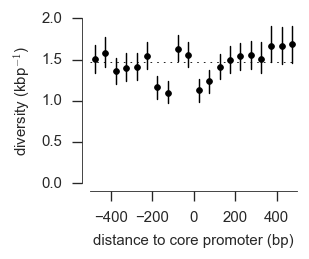

In [4]:
width = 8 * (1/3)
height = width / 1.2
fig, ax = plt.subplots(figsize=(width, height))
plot_indel_cp_diversity(ax, is_str=True, n_boot=1000)
fig.tight_layout()
fig.savefig('../../artwork/main/fig1C1.jpeg', dpi=1200, jpeg_quality=100);

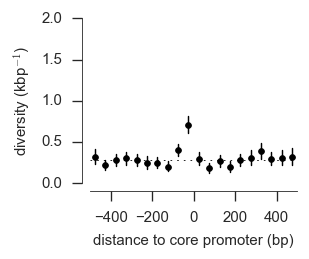

In [5]:
width = 8 * (1/3)
height = width / 1.2
fig, ax = plt.subplots(figsize=(width, height))
plot_indel_cp_diversity(ax, is_str=False, n_boot=1000)
fig.tight_layout()
fig.savefig('../../artwork/main/fig1C2.jpeg', dpi=1200, jpeg_quality=100);